In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go


In [ ]:

# Path to the CSV file
file_path = "C:/Users/chimi/Desktop/Python Data Science Projects/airbnb-rentalprice/task3- data/athens_rental.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


In [ ]:
df.shape

(461598, 24)

In [ ]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0


In [ ]:
df.columns

Index(['listing_id', 'name', 'host_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'reviewer_id', 'date', 'comments',
       'property_type', 'city', 'rating', 'bedrooms', 'beds', 'baths',
       'season'],
      dtype='object')

In [ ]:
# Which neighborhoods are rated the highest?

# Calculate average ratings of listings in each neighbourhood
avg_neighbourhood_ratings = df.groupby('neighbourhood')['rating'].sum().sort_values(ascending=True)  # Note the sorting step here

# Create bar plot using plotly
fig = go.Figure(go.Bar(
    x=avg_neighbourhood_ratings.values,
    y=avg_neighbourhood_ratings.index,
    orientation='h'  # Horizontal orientation
))

fig.update_layout(
    title='Total Ratings by Neighbourhood',
    xaxis_title='Average Rating',
    yaxis_title='Neighbourhood'
)

fig.show()

In [ ]:
# Which types of rooms receive the highest ratings?


# Group by 'room_type' and calculate the mean rating
room_type_ratings = df.groupby('room_type')['rating'].sum().sort_values(ascending=False)

# Create a bar plot using plotly
fig = go.Figure(go.Bar(
    x=room_type_ratings.index,
    y=room_type_ratings.values,
))

fig.update_layout(
    title='Total Ratings by Room Type',
    xaxis_title='Room Type',
    yaxis_title='Average Rating'
)

fig.show()

In [ ]:
# Looking at ratings by features

# Calculate sum of ratings and count by property type, room type, and neighbourhood
sum_ratings_property = df.groupby('property_type')['rating'].sum()
count_ratings_property = df.groupby('property_type').size()
average_ratings_property = (sum_ratings_property / count_ratings_property).sort_values(ascending=False)

sum_ratings_room = df.groupby('room_type')['rating'].sum()
count_ratings_room = df.groupby('room_type').size()
average_ratings_room = (sum_ratings_room / count_ratings_room).sort_values(ascending=False)

sum_ratings_neighbourhood = df.groupby('neighbourhood')['rating'].sum()
count_ratings_neighbourhood = df.groupby('neighbourhood').size()
average_ratings_neighbourhood = (sum_ratings_neighbourhood / count_ratings_neighbourhood).sort_values(ascending=False)

# Create bar plots using plotly
fig_property = go.Figure(go.Bar(
    x=average_ratings_property.values,
    y=average_ratings_property.index,
    orientation='h'
))
fig_property.update_layout(title='Total Ratings by Property Type', xaxis_title='Average Rating', yaxis_title='Property Type')

fig_room = go.Figure(go.Bar(
    x=average_ratings_room.values,
    y=average_ratings_room.index,
    orientation='h'
))
fig_room.update_layout(title='Total Ratings by Room Type', xaxis_title='Average Rating', yaxis_title='Room Type')

fig_neighbourhood = go.Figure(go.Bar(
    x=average_ratings_neighbourhood.values,
    y=average_ratings_neighbourhood.index,
    orientation='h'
))
fig_neighbourhood.update_layout(title='Total Ratings by Neighbourhood', xaxis_title='Average Rating', yaxis_title='Neighbourhood')

# Display the figures
fig_property.show()
fig_room.show()
fig_neighbourhood.show()


In [ ]:
# How does the average rating of properties vary based on the number of bedrooms and beds, as visualized in a bubble plot?


grouped = df.groupby(['bedrooms', 'beds']).agg(avg_rating=('rating', 'mean')).reset_index()

# Create bubble plot
fig = px.scatter(grouped,
                 x='bedrooms',
                 y='beds',
                 color='avg_rating',
                 color_continuous_scale='viridis',
                 hover_data=['avg_rating'],
                 title="Properties' Average Ratings by Number of Bedrooms and Beds")

fig.update_layout(
    xaxis_title="Number of Bedrooms",
    yaxis_title="Number of Beds"
)
fig.update_coloraxes(colorbar_title="Average Rating")

fig.show()


<function matplotlib.pyplot.show(close=None, block=None)>

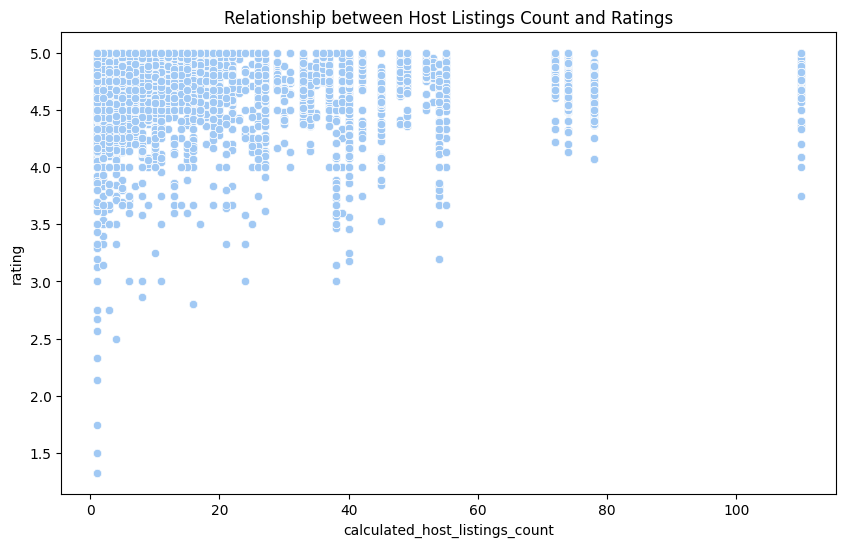

In [ ]:
# Do hosts with a greater number of listings tend to have higher ratings?
# In other words, is there a positive correleation between the quantity of a host's listings and the ratings they receive
plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated_host_listings_count', y='rating', data=df)
plt.title('Relationship between Host Listings Count and Ratings')
plt.show

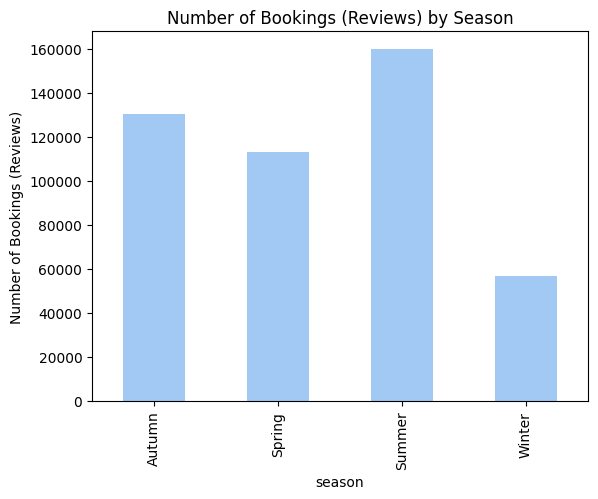

In [ ]:
# Which season has the highest number of booking(booking calculated by reviews)?

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Categorize dates into seasons
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['date'].apply(get_season)

# Group and count reviews by season
season_counts = df.groupby('season').size()

# Visualization
season_counts.plot(kind='bar', title='Number of Bookings (Reviews) by Season')
plt.ylabel('Number of Bookings (Reviews)')
plt.show()

In [ ]:
df.columns

Index(['listing_id', 'name', 'host_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'reviewer_id', 'date', 'comments',
       'property_type', 'city', 'rating', 'bedrooms', 'beds', 'baths',
       'season'],
      dtype='object')

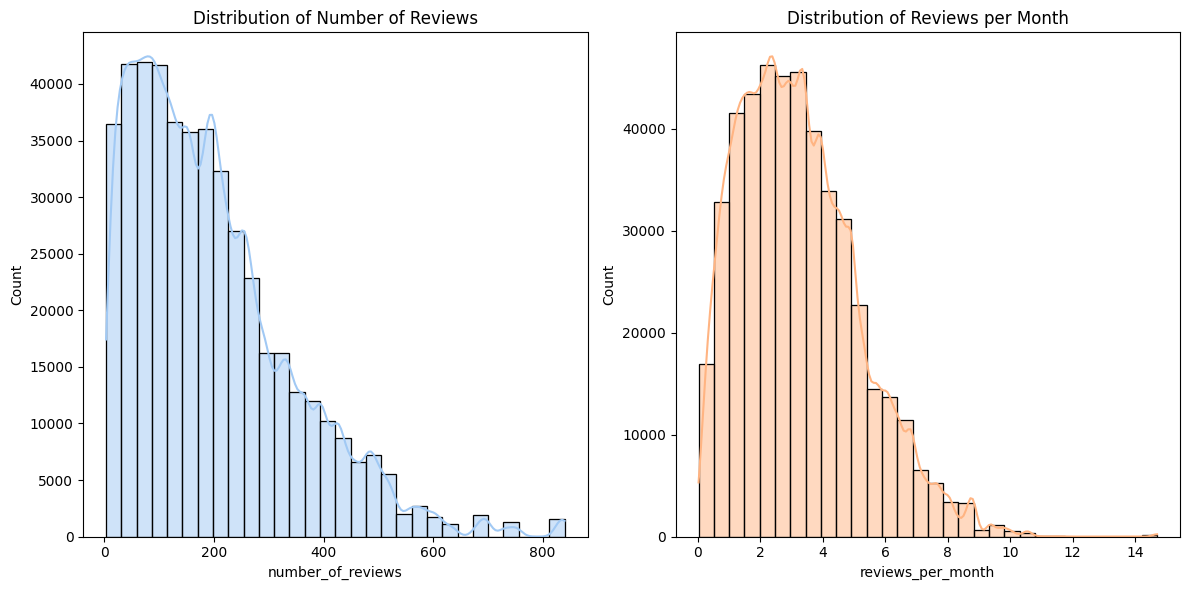

In [ ]:
# What is the distribution of number_of_review and reviews_per_month?

# Set color palette to "pastel"
sns.set_palette("pastel")

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the plots
sns.histplot(df['number_of_reviews'], bins=30, kde=True, ax=axes[0], color=sns.color_palette()[0])
axes[0].set_title('Distribution of Number of Reviews')

sns.histplot(df['reviews_per_month'], bins=30, kde=True, ax=axes[1], color=sns.color_palette()[1])
axes[1].set_title('Distribution of Reviews per Month')

# Ensure the subplots do not overlap and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Convert all values to floats, return NaN if the conversion fails
df['rating'] = df['rating'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Drop rows with NaN in 'your_column'
df = df.dropna(subset=['rating'])

Text(0.5, 1.0, 'Average Avaliability by room_type')

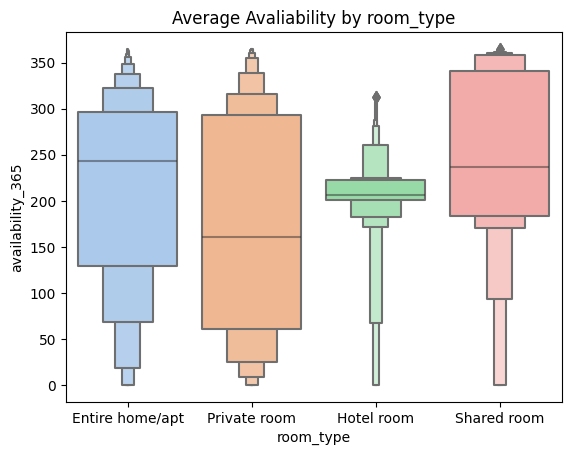

In [ ]:
# What is average avaliability out of the year by room_type?
plt.figure()
sns.boxenplot(y='availability_365' , x = 'room_type', data=df, palette='pastel')
plt.title('Average Avaliability by room_type')

In [ ]:
# How does the avaliability vary across seasons?

# Convert availability to percentage
df['availability_percentage'] = (df['availability_365'] / 365) * 100

#  Overall Seasonal Availability (as %)
seasonal_availability = df.groupby('season')['availability_percentage'].mean().reset_index()
fig1 = px.bar(seasonal_availability, x='season', y='availability_percentage', title="Overall Seasonal Availability (%)")
fig1.show()

# Seasonal Availability by Neighbourhood (as %)
neighbourhood_availability = df.groupby(['season', 'neighbourhood'])['availability_percentage'].mean().reset_index()
fig2 = px.bar(neighbourhood_availability, x='season', y='availability_percentage', color='neighbourhood', title="Seasonal Availability by Neighbourhood (%)")
fig2.show()

# Seasonal Availability by Property Type (as %)
property_availability = df.groupby(['season', 'property_type'])['availability_percentage'].mean().reset_index()
fig3 = px.bar(property_availability, x='season', y='availability_percentage', color='property_type', title="Seasonal Availability by Property Type (%)")
fig3.show()


#  Investigate the Impact of Seasons on Ratings
seasonal_ratings = df.groupby('season')['rating'].mean().reset_index()
fig4 = px.bar(seasonal_ratings, x='season', y='rating', title="Average Ratings by Season")
fig4.show()

# Explore Price Variations Across Seasons
seasonal_prices = df.groupby('season')['price'].mean().reset_index()
fig5 = px.bar(seasonal_prices, x='season', y='price', title="Average Price by Season")
fig5.show()

# Number of Reviews by Season
seasonal_reviews = df.groupby('season')['number_of_reviews'].sum().reset_index()
fig6 = px.bar(seasonal_reviews, x='season', y='number_of_reviews', title="Total Number of Reviews by Season")
fig6.show()

# Minimum Nights Requirement by Season
seasonal_nights = df.groupby('season')['minimum_nights'].mean().reset_index()
fig7 = px.bar(seasonal_nights, x='season', y='minimum_nights', title="Average Minimum Nights Requirement by Season")
fig7.show()

# Availability of Different Room Types by Season (as %)
room_type_availability = df.groupby(['season', 'room_type'])['availability_percentage'].mean().reset_index()
fig8 = px.bar(room_type_availability, x='season', y='availability_percentage', color='room_type', title="Seasonal Availability by Room Type (%)")
fig8.show()
